In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split

In [2]:
print("MNIST VERİ SETİ YÜKLENİYOR")
(x_train, y_train) , (x_test, y_test) = keras.datasets.mnist.load_data()

MNIST VERİ SETİ YÜKLENİYOR


In [3]:
x_train = x_train.reshape(-1,28,28,1)
x_test = x_test.reshape(-1,28,28,1)

x_train = x_train.astype('float32')/255.0
x_test = x_test.astype('float32')/255.0

print(f"Eğitim verilerinin boyutu ve sayısı= {x_train.shape}")
print(f"Test verilerinin boyutu ve sayısı= {x_test.shape}")


Eğitim verilerinin boyutu ve sayısı= (60000, 28, 28, 1)
Test verilerinin boyutu ve sayısı= (10000, 28, 28, 1)


In [4]:
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test,10)

In [5]:
X_train, X_val, y_train_split, y_val = train_test_split(
    x_train,
    y_train,
    test_size=0.2,
    random_state=42,
    stratify=y_train
)

print(f" veri bölme sonrası boyutlar:")
print(f"eğitim verisi boyutu:{X_train.shape}")
print(f" validation verisi boyutu:{X_val.shape}")

    

 veri bölme sonrası boyutlar:
eğitim verisi boyutu:(48000, 28, 28, 1)
 validation verisi boyutu:(12000, 28, 28, 1)


In [6]:
model = keras.Sequential([
    keras.layers.Conv2D(32,(3,3), activation='relu', input_shape=(28,28,1)),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(32, (3,3),activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Dropout(0.25),

    keras.layers.Conv2D(64,(3,3), activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(64, (3,3),activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Dropout(0.25),


    keras.layers.Flatten(),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10, activation='softmax')
    
])


In [7]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [8]:
model_checkpoint = keras.callbacks.ModelCheckpoint(
    'two_blocks_cnn_for_mnist_dataset.h5',
    monitor ='val_accuracy',
    save_best_only=True,
    mode='max', verbose = 1)

In [10]:
history = model.fit(X_train,y_train_split,validation_data=(X_val,y_val),
          batch_size=128, epochs=5, callbacks=model_checkpoint,
          verbose=1)

Epoch 1/5
375/375 [==============================] - ETA: 0s - loss: 0.0303 - accuracy: 0.9908
Epoch 1: val_accuracy improved from 0.99175 to 0.99342, saving model to two_blocks_cnn_for_mnist_dataset.h5
375/375 [==============================] - 52s 139ms/step - loss: 0.0303 - accuracy: 0.9908 - val_loss: 0.0243 - val_accuracy: 0.9934
Epoch 2/5
375/375 [==============================] - ETA: 0s - loss: 0.0276 - accuracy: 0.9914
Epoch 2: val_accuracy did not improve from 0.99342
375/375 [==============================] - 54s 144ms/step - loss: 0.0276 - accuracy: 0.9914 - val_loss: 0.0285 - val_accuracy: 0.9918
Epoch 3/5
375/375 [==============================] - ETA: 0s - loss: 0.0273 - accuracy: 0.9912
Epoch 3: val_accuracy did not improve from 0.99342
375/375 [==============================] - 55s 146ms/step - loss: 0.0273 - accuracy: 0.9912 - val_loss: 0.0249 - val_accuracy: 0.9931
Epoch 4/5
375/375 [==============================] - ETA: 0s - loss: 0.0255 - accuracy: 0.9918
Epoch 4:

In [12]:
print("Test verisi üzerinde model değerlendirmesi başlıyor...")
test_loss, test_accuracy = model.evaluate(x_test, y_test)

print(f"Modelin hata oranı ={test_loss}")
print(f"Modelin doğruluk oranı = {test_accuracy}")

Test verisi üzerinde model değerlendirmesi başlıyor...
313/313 [==============================] - 3s 10ms/step - loss: 0.0214 - accuracy: 0.9932
Modelin hata oranı =0.021362096071243286
Modelin doğruluk oranı = 0.9932000041007996


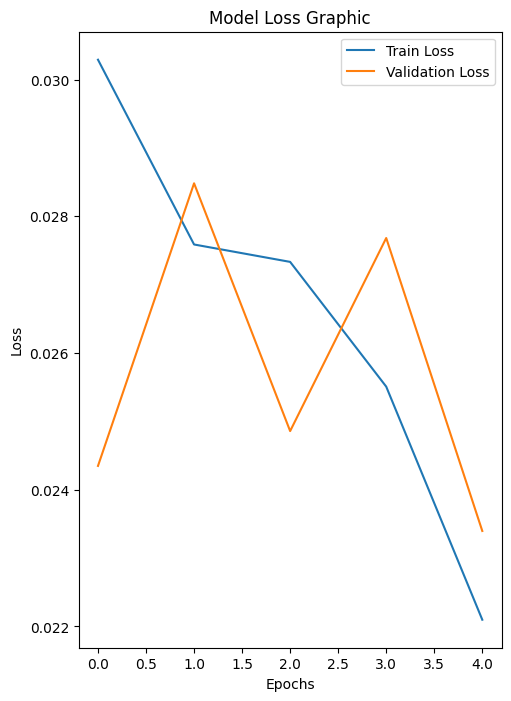

In [13]:
plt.figure(figsize=(12,8))

plt.subplot(1,2,1)
plt.plot(history.history["loss"],label="Train Loss")
plt.plot(history.history["val_loss"],label="Validation Loss")
plt.title("Model Loss Graphic")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

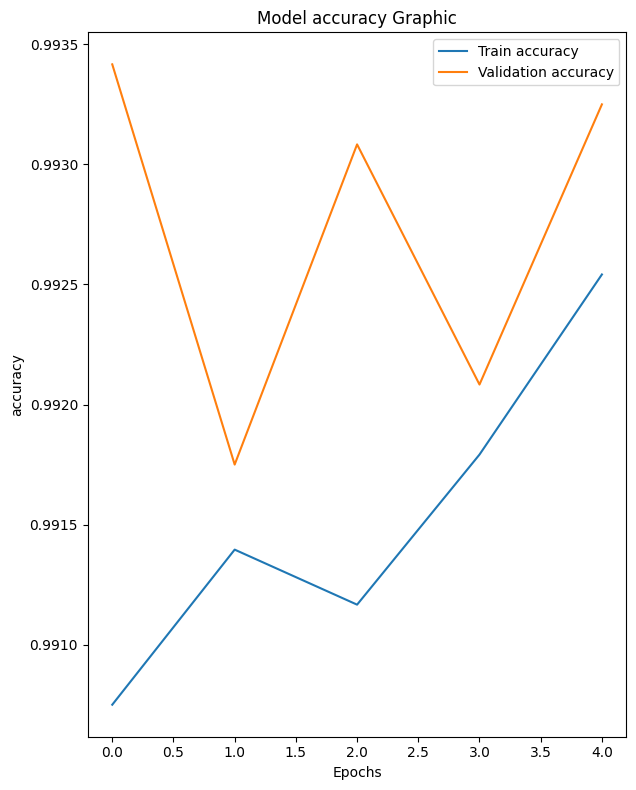

In [15]:
plt.figure(figsize=(12,8))

plt.subplot(1,2,1)
plt.plot(history.history["accuracy"],label="Train accuracy")
plt.plot(history.history["val_accuracy"],label="Validation accuracy")
plt.title("Model accuracy Graphic")
plt.xlabel("Epochs")
plt.ylabel("accuracy")
plt.legend()

plt.tight_layout()
plt.show()

In [22]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

y_pred= model.predict(x_test)

y_pred_classes= np.argmax(y_pred,axis=1)
y_test_classes= np.argmax(y_test,axis=1)

313/313 [==============================] - 3s 10ms/step


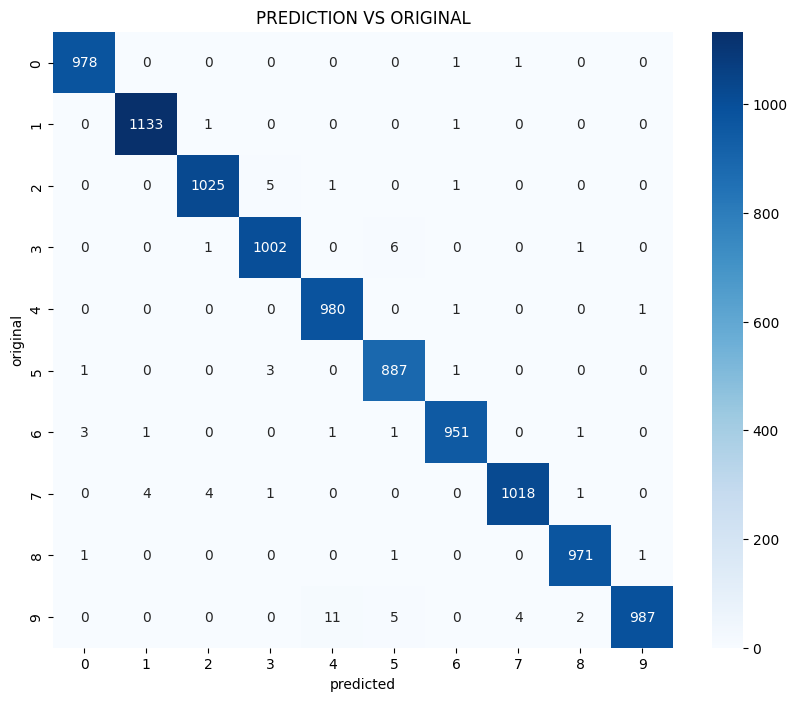

In [25]:
cm =confusion_matrix(y_test_classes, y_pred_classes)

plt.figure(figsize=(10,8))
sns.heatmap(cm, fmt='d', annot=True, cmap="Blues")
plt.title("PREDICTION VS ORIGINAL")
plt.xlabel("predicted")
plt.ylabel("original")
plt.show()